In [1]:
from docplex.mp.model import Model
import numpy as np
import matplotlib.pyplot as plt
from callbacks import NodeSelection_MLBased, VariableSelection_MLBased
import torch
from torch import nn

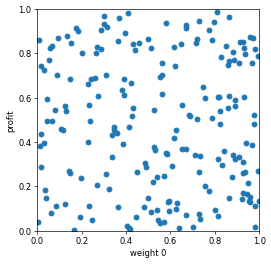

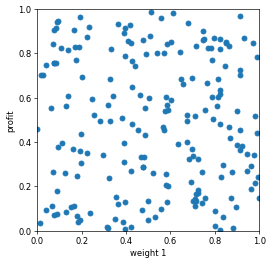

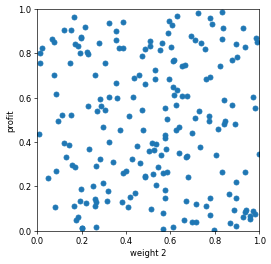

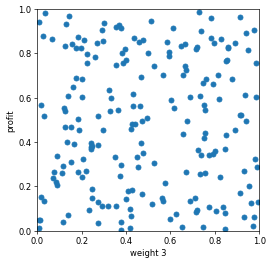

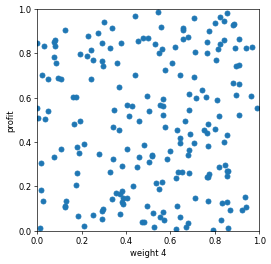

In [2]:
num_items = 200
num_dimensions = 5
items = np.arange(num_items).reshape(-1, 1)

rand = np.random.default_rng(0)
W = rand.random((num_dimensions, num_items))
p = rand.random(num_items)
b = rand.random(num_items) * num_items / 2

for i in range(num_dimensions):
    plt.figure(dpi=60)
    plt.scatter(W[i], p)
    plt.xlabel(f'weight {i}')
    plt.ylabel('profit')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [3]:
model = Model('Multidimensional_KP')
callbacks = [NodeSelection_MLBased, VariableSelection_MLBased]

module = nn.Linear(num_items, 1)

for cb_class in callbacks:
    cb = model.register_callback(cb_class)
    cb.set_module(module, verbose=True)

x = model.binary_var_list(items, name='x')

# capacity constraint
model.add_constraints(W[d] @ x <= b[d] for d in range(num_dimensions))

# objective function
model.maximize(x @ p)

# solve the model
solution = model.solve(log_output=False)

<callbacks.NodeSelection_MLBased object at 0x7fd0027bd040>: Linear(in_features=200, out_features=1, bias=True)
<callbacks.VariableSelection_MLBased object at 0x7fd00284ca90>: Linear(in_features=200, out_features=1, bias=True)
(-63.6503265940785, [(5, 'U', 0.0)])
(-63.6503265940785, [(5, 'L', 1.0)])
_________________________________________________________
(-57.19157765179841, [(167, 'U', 0.0)])
(-57.19157765179841, [(167, 'L', 1.0)])
_________________________________________________________
(-57.18799216518043, [(152, 'L', 1.0)])
(-57.18799216518043, [(152, 'U', 0.0)])
_________________________________________________________
(-57.19133070629826, [(152, 'L', 1.0)])
(-57.19133070629826, [(152, 'U', 0.0)])
_________________________________________________________
(-57.18930316794972, [(3, 'L', 1.0)])
(-57.18930316794972, [(3, 'U', 0.0)])
_________________________________________________________
(-60.81928679290893, [(72, 'L', 1.0)])
(-60.81928679290893, [(72, 'U', 0.0)])
________________

Total profit: 57.127072900366436


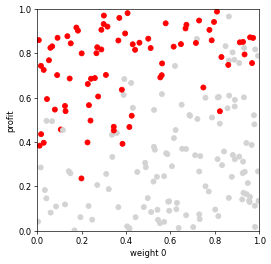

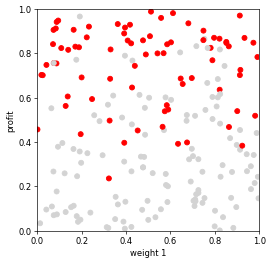

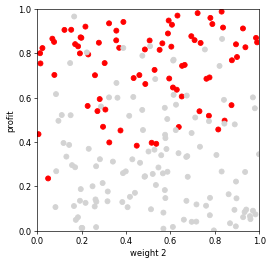

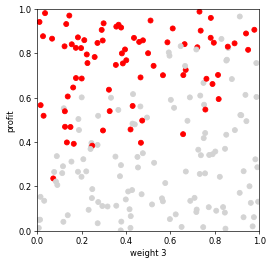

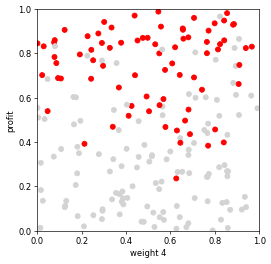

In [4]:
included = solution.get_value_list(x)

print(f'Total profit: {solution.objective_value}')

for d in range(num_dimensions):
    plt.figure(dpi=60)
    plt.scatter(W[d], p, c=['red' if i else 'lightgrey' for i in included])
    plt.xlabel(f'weight {d}')
    plt.ylabel('profit')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.gca().set_aspect('equal', adjustable='box')